In [3]:
import pandas as pd
import numpy as np
import random
import math
import collections
import matplotlib.pyplot as plt

data = pd.read_csv('processedData.csv')

data.dtypes



Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Day_of_Week                                      int64
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_Detail                                  int64
2nd_Road_Number                                  int64
Pedestrian_Crossing-Physical_Facilities          int64
Light_Cond

In [35]:
#Partitioning Data into each each appropriate borough
e13 = pd.DataFrame(columns = data.columns.to_list())
e14 = pd.DataFrame(columns = data.columns.to_list())
e15 = pd.DataFrame(columns = data.columns.to_list())

#Local_Authority_Highway_codes
lahc = ['E09000013','E09000014','E09000015']

eList = [e13, e14, e15]

for e in eList:
    for key, val in dict(data.dtypes).items():
        if val == 'int64' or val == 'float64':
            e[key] = pd.to_numeric(e[key])
for i in range(3):
    lacRows = data.loc[data['Local_Authority_(Highway)'] == lahc[i]]
    eList[i] = pd.concat([eList[i], lacRows])
    print(eList[i].shape)

(3439, 26)
(3751, 26)
(2184, 26)


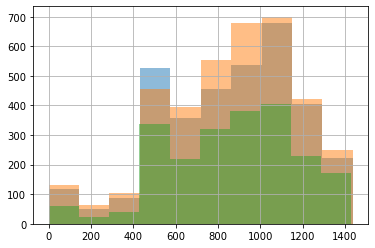

In [18]:
for e in eList:
    e['TimeVals'].hist(alpha= 0.5, bins = 10)

{6: 82.34952020936319, 3: 8.490840360569933, 1: 5.495783658040128, 2: 3.663855772026752}
{6: 91.41562250066649, 3: 4.852039456145028, 2: 2.159424153559051, 1: 1.5729138896294321}
{6: 90.06410256410257, 1: 5.631868131868132, 3: 3.983516483516483, 2: 0.3205128205128205}


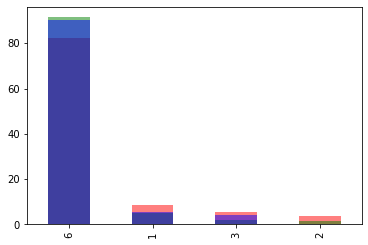

In [41]:
colrs = ['red', 'green', 'blue']
for e, c in zip(eList, colrs):
    inD = dict(e['Road_Type'].value_counts())
    outD = {}
    for k, v in inD.items():
        outD[k] = v / e.shape[0] * 100
    pd.Series(outD).plot(kind='bar', alpha= 0.5, color=c)
    print(outD)

In [46]:
def bucketNumeric(datf, cols, bucket, depth):
    
    
    outDF = pd.DataFrame()
    #refDF = pd.DataFrame()
    for col in datf.columns.to_list():
        if (col in cols and depth == False):  
            spread = datf[col].max() - datf[col].min()
            mini = datf[col].min()
            vals = []
            for i in datf[col]:
                for x in range(bucket):
                    if( i - mini > (spread / bucket) * (x + 1)):
                        continue
                    else:
                        vals.append(x)
                        break
            outDF[col] = vals
        if (col in cols and depth):
            amount = datf.shape[0] / bucket
            couts = collections.OrderedDict(sorted(dict(datf[col].value_counts()).items()))
            valsDict = {}
            vals =[]
            i = 0
            curr = 0
            valsDict[i] = []
            for k, v in couts.items():
                if(curr + v <= amount or i+1 == bucket):
                    valsDict[i].append(k)
                    curr += v
                else:
                    curr = 0
                    i += 1
                    valsDict[i] = []
                    valsDict[i].append(k)
                    curr += v
            for row in datf[col]:
                for k, v in valsDict.items():
                    if row in v:
                        vals.append(k)
                        break
            outDF[col] = vals
        else:
            outDF[col] = datf[col]
            
    return outDF

i = 1
for e in eList:
    out = bucketNumeric(e, ['TimeVals'], 10, True)
    print( i, ': ',list(out['TimeVals'].value_counts().keys()))
    i +=1
    


1 :  [9, 2, 1, 3, 6, 8, 7, 5, 0, 4]
2 :  [9, 0, 2, 7, 6, 1, 5, 8, 4, 3]
3 :  [9, 0, 4, 8, 1, 3, 5, 7, 2, 6]


In [44]:
test = bucketNumeric(data, ['TimeVals'], 5, True)
test['TimeVals'].value_counts()

4    1906
1    1874
3    1869
2    1867
0    1858
Name: TimeVals, dtype: int64

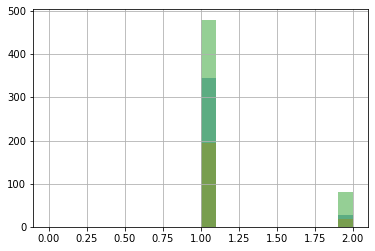

In [26]:
x = 'Road_Type'
y = 'Number_of_Casualties'
for i in range(len(list(data[x].unique()))):
    da = data.loc[data[x] == i+1]
    da[y].hist(alpha = 0.5)

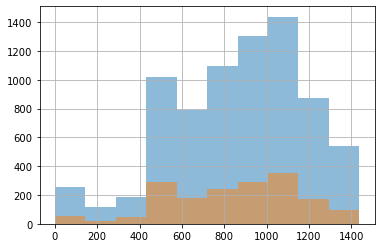

In [14]:
x = 'Did_Police_Officer_Attend_Scene_of_Accident'
y = 'TimeVals'
for i in range(len(list(data[x].unique()))):
    da = data.loc[data[x] == i+1]
    da[y].hist(alpha = 0.5)

In [31]:
collections.OrderedDict(sorted(dict(data['TimeVals'].value_counts()).items()))

OrderedDict([(0, 8),
             (1, 2),
             (3, 2),
             (4, 8),
             (6, 2),
             (8, 2),
             (9, 14),
             (11, 3),
             (12, 3),
             (13, 1),
             (14, 9),
             (15, 2),
             (16, 1),
             (17, 2),
             (18, 2),
             (19, 9),
             (20, 2),
             (23, 2),
             (24, 4),
             (25, 2),
             (26, 2),
             (27, 2),
             (28, 2),
             (29, 21),
             (30, 1),
             (31, 1),
             (32, 2),
             (33, 2),
             (34, 6),
             (35, 2),
             (36, 2),
             (37, 1),
             (38, 1),
             (39, 9),
             (40, 1),
             (41, 2),
             (42, 1),
             (44, 3),
             (46, 2),
             (47, 1),
             (48, 1),
             (49, 10),
             (51, 2),
             (53, 3),
             (54, 4),
             (

In [13]:
len(list(data['Accident_Severity'].unique()))

2